# Table of Contents

<div class="alert alert-block alert-info">
    <ol>
        <li>Objectives
            <ol style="list-style-type:none;padding-left:0">
                <li>1.1 Business Questions</li>
                <li>1.2 Dataset Description</li>
            </ol>
        </li>
        <li>Data preprocessing
            <ol style="list-style-type:none;padding-left:0">
                <li>2.1 Removing Duplicate Data</li>
                <li>2.2 Detecting Missing Values</li>
                <li>2.3 Converting Data Types</li>
                <li>2.4 Checking for Error Data</li>
                <li>2.5 Creating a New Feature: Profit</li>
                <li>2.6 Detecting and Handling Outliers</li>
                <li>2.7 Data Transformation For RFM Analysis</li>
                <li>2.8 Saving Preprocessed Data for the Dashboard</li>
            </ol>
        </li>
        <li>Exploratory Data Analysis (EDA)
            <ol style="list-style-type:none;padding-left:0">
                <li>3.1 Skewness Transformation</li>
                <li>3.2 Pairplot</li>
                <li>3.3 Correlation Matrix</li>
                <li>3.4 In-Depth Analysis</li>
            </ol>
        </li>
    </ol>
</div>

Dataset Source: https://www.kaggle.com/datasets/ddosad/auto-sales-data/data

# 1. Objectives

This project aims to perform an RFM analysis on automobile sales data to segment customers by recency, frequency, and monetary values, identifying high-value clients. The insights and recommendations will enhance marketing strategies, improve customer satisfaction, and boost sales.

## 1.1 Business Questions
1. What are the total numbers of customers, transactions, and sales, as well as the average values for recency, frequency, and monetary metrics?
2. Which customer segments contribute the most to total sales?
3. Which product categories generate the highest total sales across different customer segments, and what are the top-performing items within these categories for each segment?
4. How does the size of a deal correlate with total sales?
5. What are the trends in sales and the number of customers over time?

## 1.2 Dataset Description

| Column Name               | Description                                                                                                               |
|---------------------------|---------------------------------------------------------------------------------------------------------------------------|
| ORDERNUMBER               | This column represents the unique identification number assigned to each order.                                           |
| QUANTITYORDERED           | It indicates the number of items ordered in each order.                                                                   |
| PRICEEACH                 | This column specifies the price of each item in the order.                                                                |
| ORDERLINENUMBER           | It represents the line number of each item within an order.                                                               |
| SALES                     | This column denotes the total sales amount for each order, which is calculated by multiplying the quantity ordered by the price of each item. |
| ORDERDATE                 | It denotes the date on which the order was placed.                                                                         |
| DAYS_SINCE_LASTORDER      | This column represents the number of days that have passed since the last order for each customer. It can be used to analyze customer purchasing patterns. |
| STATUS                    | It indicates the status of the order, such as "Shipped," "In Process," "Cancelled," "Disputed," "On Hold," or "Resolved."  |
| PRODUCTLINE               | This column specifies the product line categories to which each item belongs.                                              |
| MSRP                      | It stands for Manufacturer's Suggested Retail Price and represents the suggested selling price for each item.             |
| PRODUCTCODE               | This column represents the unique code assigned to each product.                                                           |
| CUSTOMERNAME              | It denotes the name of the customer who placed the order.                                                                  |
| PHONE                     | This column contains the contact phone number for the customer.                                                           |
| ADDRESSLINE1              | It represents the first line of the customer's address.                                                                   |
| CITY                      | This column specifies the city where the customer is located.                                                             |
| POSTALCODE                | It denotes the postal code or ZIP code associated with the customer's address.                                             |
| COUNTRY                   | This column indicates the country where the customer is located.                                                          |
| CONTACTLASTNAME           | It represents the last name of the contact person associated with the customer.                                           |
| CONTACTFIRSTNAME          | This column denotes the first name of the contact person associated with the customer.                                     |
| DEALSIZE                  | It indicates the size of the deal or order, which are the categories "Small," "Medium," or "Large."                       |


# 2. Data preprocessing

In [1]:
# Import all librariers
from utils import *

In [2]:
df = pd.read_csv('dataset/Auto Sales data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   object 
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE           

In [4]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


## 2.1 Removing Duplicate Data

In [5]:
df.duplicated().sum().sum()

0

There are no duplicates in the dataset.

## 2.2 Detecting Missing Values

In [6]:
df.isna().sum().sum()

0

There are no missing values in the dataset.

## 2.3 Converting Data Types

In [7]:
df['ORDERNUMBER'] = df['ORDERNUMBER'].astype(str)
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], format='%d/%m/%Y')

## 2.4 Checking for Error Data

In [8]:
df["ORDERNUMBER"].value_counts().sort_index()

10100     4
10101     4
10102     2
10103    16
10104    13
         ..
10421     2
10422     2
10423     5
10424     6
10425    13
Name: ORDERNUMBER, Length: 298, dtype: int64

There are no errors in this feature.

In [9]:
df["QUANTITYORDERED"].value_counts().sort_index()

6       2
10      2
11      2
12      1
13      1
15      4
16      1
18      3
19      3
20     90
21    101
22     89
23     71
24     88
25     90
26     94
27     98
28     79
29     92
30     74
31     95
32     90
33     88
34    111
35     67
36     87
37     83
38     88
39     79
40     77
41     95
42     74
43     81
44     88
45     96
46     99
47     70
48     89
49     88
50     63
51      4
52      1
54      2
55     16
56      3
58      1
59      3
60      3
61      3
62      1
64      3
65      1
66      5
70      2
76      3
77      1
85      1
97      1
Name: QUANTITYORDERED, dtype: int64

There are no errors in this feature.

In [10]:
df["PRICEEACH"].value_counts().sort_index()

26.88     1
28.29     1
28.88     1
29.21     2
29.54     3
         ..
244.30    1
245.20    3
248.59    1
250.73    1
252.87    1
Name: PRICEEACH, Length: 1843, dtype: int64

There are no errors in this feature.

In [11]:
df["ORDERLINENUMBER"].value_counts().sort_index()

1     298
2     282
3     261
4     247
5     231
6     213
7     191
8     182
9     162
10    139
11    127
12    109
13     96
14     80
15     55
16     41
17     24
18      9
Name: ORDERLINENUMBER, dtype: int64

There are no errors in this feature.

In [12]:
df["SALES"].value_counts().sort_index()

482.13      1
541.14      1
553.95      1
577.60      1
640.05      1
           ..
11886.60    1
11887.80    1
12001.00    1
12536.50    1
14082.80    1
Name: SALES, Length: 2690, dtype: int64

There are no errors in this feature.

In [13]:
df["ORDERDATE"].value_counts().sort_index()

2018-01-06     4
2018-01-09     4
2018-01-10     2
2018-01-29    16
2018-01-31    13
              ..
2020-05-13     6
2020-05-17    14
2020-05-29    15
2020-05-30     7
2020-05-31    19
Name: ORDERDATE, Length: 246, dtype: int64

There are no errors in this feature.

In [14]:
df["DAYS_SINCE_LASTORDER"].value_counts().sort_index()

42      1
50      1
76      1
79      1
92      1
       ..
3483    1
3499    1
3503    1
3530    1
3562    1
Name: DAYS_SINCE_LASTORDER, Length: 1832, dtype: int64

There are no errors in this feature.

In [15]:
df["STATUS"].value_counts().sort_index()

Cancelled       60
Disputed        14
In Process      41
On Hold         44
Resolved        47
Shipped       2541
Name: STATUS, dtype: int64

There are no errors in this feature.

In [16]:
df["PRODUCTLINE"].value_counts().sort_index()

Classic Cars        949
Motorcycles         313
Planes              304
Ships               230
Trains               77
Trucks and Buses    295
Vintage Cars        579
Name: PRODUCTLINE, dtype: int64

There are no errors in this feature.

In [17]:
df["MSRP"].value_counts().sort_index()

33     24
35     28
37     26
40     24
41     21
       ..
173    26
193    24
194    24
207    26
214    26
Name: MSRP, Length: 80, dtype: int64

There are no errors in this feature.

In [18]:
pd.set_option('display.max_rows', None)
df["PRODUCTCODE"].value_counts().sort_index()

S10_1678     24
S10_1949     26
S10_2016     24
S10_4698     24
S10_4757     25
S10_4962     27
S12_1099     24
S12_1108     26
S12_1666     26
S12_2823     24
S12_3148     25
S12_3380     24
S12_3891     26
S12_3990     24
S12_4473     27
S12_4675     25
S18_1097     26
S18_1129     27
S18_1342     24
S18_1367     23
S18_1589     25
S18_1662     26
S18_1749     21
S18_1889     25
S18_1984     27
S18_2238     27
S18_2248     21
S18_2319     26
S18_2325     24
S18_2432     27
S18_2581     23
S18_2625     24
S18_2795     25
S18_2870     25
S18_2949     25
S18_2957     25
S18_3029     25
S18_3136     25
S18_3140     25
S18_3232     51
S18_3259     25
S18_3278     23
S18_3320     24
S18_3482     24
S18_3685     25
S18_3782     24
S18_3856     25
S18_4027     26
S18_4409     21
S18_4522     26
S18_4600     27
S18_4668     26
S18_4721     23
S18_4933     22
S24_1046     23
S24_1444     28
S24_1578     24
S24_1628     24
S24_1785     23
S24_1937     24
S24_2000     25
S24_2011     25
S24_2022

There are no errors in this feature.

In [19]:
df["CUSTOMERNAME"].value_counts().sort_index()

AV Stores, Co.                         51
Alpha Cognac                           20
Amica Models & Co.                     26
Anna's Decorations, Ltd                46
Atelier graphique                       7
Australian Collectables, Ltd           23
Australian Collectors, Co.             55
Australian Gift Network, Co            15
Auto Assoc. & Cie.                     18
Auto Canal Petit                       27
Auto-Moto Classics Inc.                 8
Baane Mini Imports                     32
Bavarian Collectables Imports, Co.     14
Blauer See Auto, Co.                   22
Boards & Toys Co.                       3
CAF Imports                            13
Cambridge Collectables Co.             11
Canadian Gift Exchange Network         22
Classic Gift Ideas, Inc                21
Classic Legends Inc.                   20
Clover Collections, Co.                16
Collectable Mini Designs Co.           25
Collectables For Less Inc.             24
Corrida Auto Replicas, Ltd        

There are no errors in this feature.

In [20]:
df["PHONE"].value_counts().sort_index()

(02) 5554 67          25
(071) 23 67 2555       8
(1) 42.34.2555        23
(1) 47.55.6555        27
(171) 555-0297        26
(171) 555-1555        51
(171) 555-2282        29
(171) 555-7555        12
(198) 555-8888        26
(514) 555-8054        22
(604) 555-3392        22
(604) 555-4555        26
(91) 555 22 82        32
(91) 555 94 44       259
(93) 203 4555         23
(95) 555 82 82        15
+33 1 46 62 7555      20
+34 913 728 555       13
+353 1862 1555        16
+358 9 8045 555       30
+47 2212 1555         24
+47 2267 3215         29
+49 69 66 90 2555     22
+49 89 61 08 9555     14
+61 2 9495 8555       46
+63 2 555 3587        26
+65 221 7555          43
+65 224 1555          36
+81 06 6342 5555      20
+81 3 3584 0555       32
011-4988555           26
02 9936 8555          46
0221-5554327          26
03 9520 4555          55
035-640555            48
0522-556555           39
0695-34 6555          38
07-98 9555            32
0897-034555           31
0921-12 3555          19


There are no errors in this feature.

In [21]:
# Save the original column order
original_columns = df.columns.tolist()

In [22]:
# Apply the cleaning function to the dataframe
df['CLEANED_PHONE'] = df.apply(clean_phone_number, axis=1)

In [23]:
df[['PHONE', 'COUNTRY', 'CLEANED_PHONE']].sample(10)

,PHONE,COUNTRY,CLEANED_PHONE
1112,0921-12 3555,Sweden,+46 0921123555
1671,+65 224 1555,Singapore,+65 2241555
1191,4085553659,USA,+1 4085553659
1489,4155554312,USA,+1 4155554312
55,20.16.1555,France,+33 20161555
167,0921-12 3555,Sweden,+46 0921123555
1731,4085553659,USA,+1 4085553659
1599,2155551555,USA,+1 2155551555
643,86 21 3555,Denmark,+45 86213555
1324,20.16.1555,France,+33 20161555


Drop the original 'PHONE' column and rename 'CLEANED_PHONE' to 'PHONE'

In [24]:
df.drop(columns=['PHONE'], inplace=True)
df.rename(columns={'CLEANED_PHONE': 'PHONE'}, inplace=True)

# Reorder the columns to preserve the original order
df = df[original_columns]

In [25]:
df["ADDRESSLINE1"].value_counts().sort_index()

1 rue Alsace-Lorraine                          20
11328 Douglas Av.                              23
12, rue des Bouchers                           25
120 Hanover Sq.                                12
15 McCallum Street - NatWest Center #13-03     26
16780 Pompton St.                               8
1785 First Street                              26
184, chausse de Tournai                        20
1900 Oak St.                                   22
2, rue du Commerce                             41
2-2-8 Roppongi                                 32
201 Miller Street                              46
23 Tsawassen Blvd.                             26
2304 Long Airport Avenue                       34
24, place Kluber                               19
2440 Pompton St.                               19
25 Maiden Lane                                 16
25, rue Lauriston                              27
25593 South Bay Ln.                            25
265, boulevard Charonne                        23


In [26]:
# Replace incorrect Address Line
df['ADDRESSLINE1'] = df['ADDRESSLINE1'].str.replace('Berguvsvgen', 'Berguvsv gen', regex=False)
df['ADDRESSLINE1'] = df['ADDRESSLINE1'].str.replace('Rambla de Catalu¤a', 'Rambla de Catalunya', regex=False)

In [27]:
df["CITY"].value_counts().sort_index()

Aaarhus            27
Allentown          31
Barcelona          23
Bergamo            48
Bergen             29
Boras              38
Boston             44
Brickhaven         47
Bridgewater        25
Brisbane           15
Bruxelles          25
Burbank            13
Burlingame         34
Cambridge          38
Charleroi           8
Chatswood          46
Cowes              26
Dublin             16
Espoo              30
Frankfurt          22
Gensve             31
Glen Waverly       23
Glendale           22
Graz               15
Helsinki           30
Kobenhavn          36
Koln               26
Las Vegas          29
Lille              20
Liverpool          29
London             38
Lule               19
Lyon               41
Madrid            304
Makati City        26
Manchester         51
Marseille          25
Melbourne          55
Minato-ku          32
Montreal           22
Munich             14
NYC               152
Nantes             60
Nashua             34
New Bedford        61
New Haven 

There are no errors in this feature.

In [28]:
df["POSTALCODE"].value_counts().sort_index()

10022        152
10100         26
106-0032      32
1203          31
1227 MM       26
13008         25
1734          36
2             16
2060          46
2067          46
21240         30
24067         26
24100         48
28023         45
28034        259
3004          55
31000         20
3150          23
4101          15
4110          32
41101         15
42100         39
44000         60
5020          40
50553         61
50739         26
51003         44
51100         41
51247         38
530-0003      20
58339         47
59000         20
60528         22
62005         34
67000         19
69004         41
69045         36
70267         31
71270         44
75012         23
75016         27
75508         20
78000         18
79903         43
8010          15
8022          23
80686         14
8200          27
83030         29
90003         30
90110         32
91217         25
92561          3
94019         34
94217         89
97561         19
97562        205
97823         17
B-1180        

There are no errors in this feature.

In [29]:
df["COUNTRY"].value_counts().sort_index()

Australia      185
Austria         55
Belgium         33
Canada          70
Denmark         63
Finland         92
France         314
Germany         62
Ireland         16
Italy          113
Japan           52
Norway          85
Philippines     26
Singapore       79
Spain          342
Sweden          57
Switzerland     31
UK             144
USA            928
Name: COUNTRY, dtype: int64

There are no errors in this feature.

In [30]:
df["CONTACTLASTNAME"].value_counts().sort_index()

Accorti         26
Ashworth        51
Barajas         15
Benitez         26
Bennett         26
Berglund        19
Bergulfsen      32
Bertrand        23
Brown           47
Calaghan        15
Cartrain         8
Cassidy         16
Cervantes       21
Citeaux         19
Connery         23
Cruz            26
Da Cunha        20
Devon           29
Dewey           25
Donnermeyer     14
Ferguson        55
Fernandez       13
Franco          18
Fresnisre       22
Freyre         259
Frick           91
Hardy           12
Henriot         41
Hernandez       70
Hirano          34
Holz            31
Huxley          46
Ibsen           27
Karttunen       30
Keitel          22
Kentary         20
King            54
Klaeboe         24
Koskitalo       32
Kuo             10
Labrune         53
Larsson         38
Lebihan         25
Lewis           19
Lincoln         26
Mendel          15
Moroni          39
Murphy          17
Natividad       43
Nelson         204
O'Hara          46
Oeztan          29
Perrier     

There are no errors in this feature.

In [31]:
df["CONTACTFIRSTNAME"].value_counts().sort_index()

Adrian         46
Akiko          32
Allen          24
Ann            26
Anna           46
Annette        20
Arnold         26
Carine          7
Catherine      25
Christina      19
Dan            19
Daniel         38
Dean           16
Diego         259
Dominique      27
Eduardo        23
Elizabeth      55
Eric           43
Francisca      21
Frederique     19
Georg          40
Giovanni       48
Helen          26
Henriette      26
Jan            24
Janine         53
Jean           22
Jeff           48
Jesus          13
Jonas          32
Jose Pedro     15
Julie          55
Juri           60
Jytte          36
Kalle          30
Kee            10
Kwai           49
Kyung          42
Laurence       25
Leslie         28
Maria          58
Marie          23
Marta          27
Martine        20
Mart¡n         32
Mary           41
Matti          30
Maurizio       39
Michael        70
Miguel         15
Mory           20
Palle          27
Paolo          26
Pascale         8
Paul           41
Peter     

There are no errors in this feature.

In [32]:
df['CONTACTFIRSTNAME'] = df['CONTACTFIRSTNAME'].str.replace('Mart¡n', 'Martin', regex=False)

In [33]:
df["DEALSIZE"].value_counts().sort_index()

Large      152
Medium    1349
Small     1246
Name: DEALSIZE, dtype: int64

There are no errors in this feature.

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   object        
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

In [35]:
pd.reset_option('display.max_rows')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   object        
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

In [37]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,+1 2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,+33 26471555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 146627555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,+1 6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,+1 6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


## 2.5 Creating a New Feature: Profit

I estimate the Cost of Goods Sold (COGS) feature:

In [38]:
# Calculate Cost of Goods Sold (COGS)
df['COGS'] = df['QUANTITYORDERED'] * df['MSRP']

# Calculate Profit
df['PROFIT'] = df['SALES'] - df['COGS']

df = df.drop(columns=['COGS'])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   object        
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

## 2.6 Detecting and Handling Outliers

In [40]:
display(round(df.describe(),2))

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP,PROFIT
count,2747.00,2747.00,2747.00,2747.00,2747.00,2747.00,2747.00
mean,35.10,101.10,6.49,3553.05,1757.09,100.69,10.42
std,9.76,42.04,4.23,1838.95,819.28,40.11,995.50
min,6.00,26.88,1.00,482.13,42.00,33.00,-7422.72
25%,27.00,68.74,3.00,2204.35,1077.00,68.00,-343.94
50%,35.00,95.55,6.00,3184.80,1761.00,99.00,12.60
75%,43.00,127.10,9.00,4503.09,2436.50,124.00,351.62
max,97.00,252.87,18.00,14082.80,3562.00,214.00,8136.00


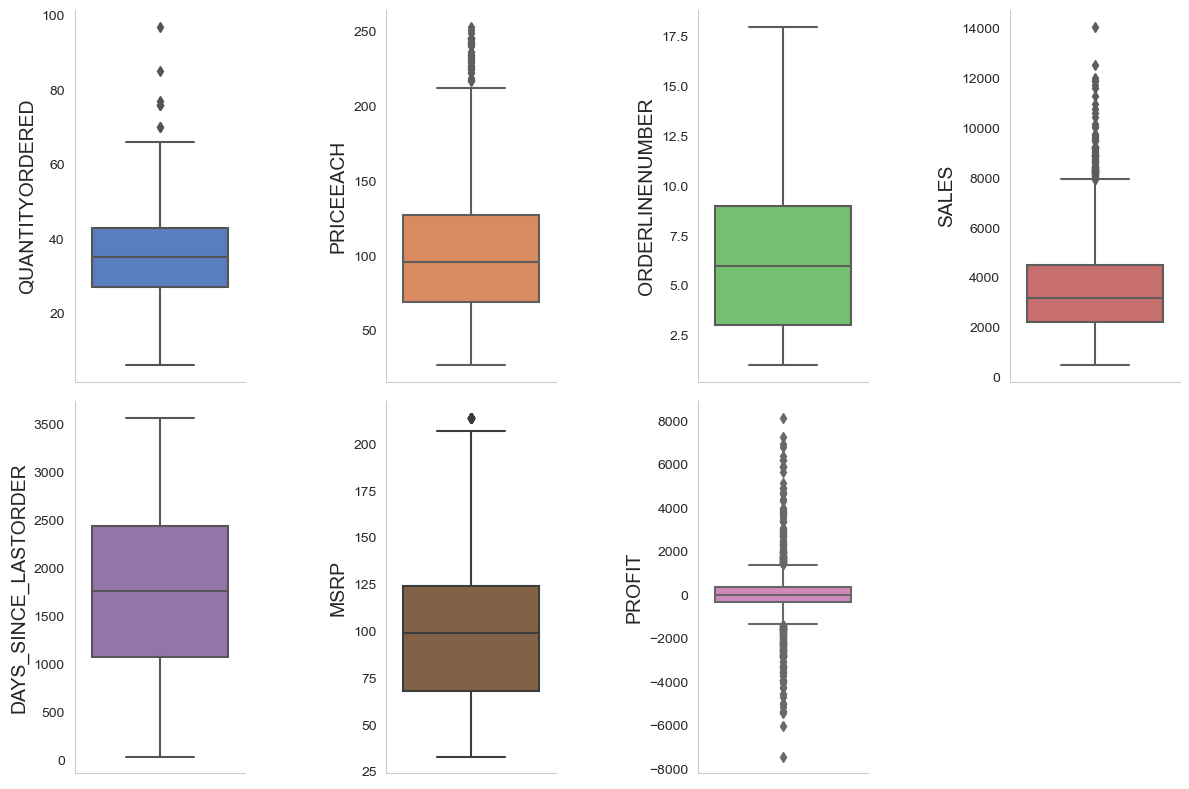

In [41]:
outliers_graph(df, df.columns.to_list())

No extreme outliers were detected.

## 2.7 Data Transformation For RFM Analysis

Adding one day ensures the snapshot date is one day after the last order, making all recency calculations positive. 

Recency is the difference between the snapshot date and the last order date.

Without adding one day, if a customer's last order is on the same day as the maximum order date, their recency would be 0, which might not be ideal for analysis.

In [42]:
# Add one day to Recency
snapshot_date = df['ORDERDATE'].max() + pd.Timedelta(days=1)

In [43]:
# Defining the Recency, Frequency, and Monetary
recency_df = df.groupby('CUSTOMERNAME').agg({
    'ORDERDATE': lambda x: (snapshot_date - x.max()).days,
    'ORDERNUMBER': 'nunique',
    'SALES': 'sum'
}).reset_index()

In [44]:
recency_df.rename(columns={
    'ORDERDATE': 'Recency',
    'ORDERNUMBER': 'Frequency',
    'SALES': 'Monetary'
}, inplace=True)

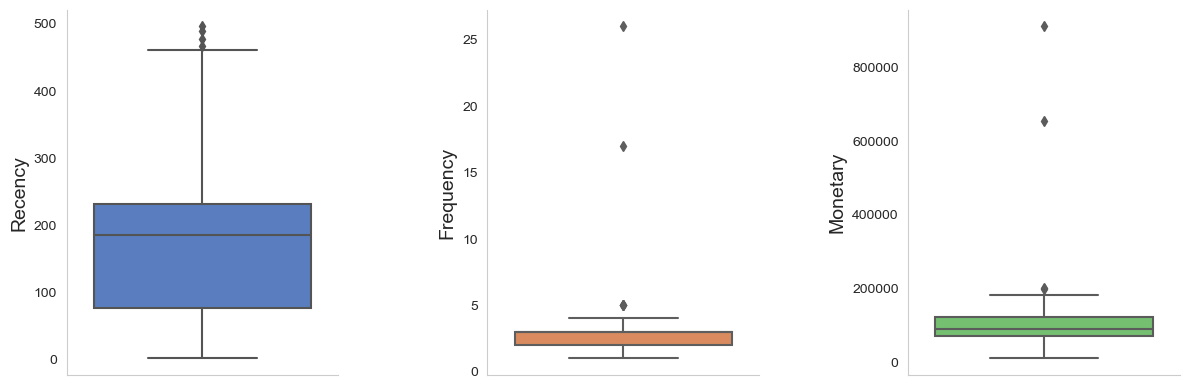

In [45]:
outliers_graph(recency_df, recency_df.columns.to_list())

No extreme outliers were detected.

In [46]:
# Checking the dataframe result
recency_df.sort_values(by='Monetary', ascending = False)

,CUSTOMERNAME,Recency,Frequency,Monetary
32,Euro Shopping Channel,1,26,912294.11
53,Mini Gifts Distributors Ltd.,3,17,654858.06
6,"Australian Collectors, Co.",185,5,200995.41
55,Muscle Machine Inc,183,4,197736.94
43,La Rochelle Gifts,1,4,180124.90
...,...,...,...,...
66,Royale Belge,143,4,33440.10
48,Microscale Inc.,211,2,33144.93
10,Auto-Moto Classics Inc.,181,3,26479.26
4,Atelier graphique,189,3,24179.96


In [47]:
# Checking whether the numbers make sense
df[df['CUSTOMERNAME'] == 'Euro Shopping Channel'][['CUSTOMERNAME', 'PRODUCTLINE', 'QUANTITYORDERED', 'SALES']].sample(10)

,CUSTOMERNAME,PRODUCTLINE,QUANTITYORDERED,SALES
2241,Euro Shopping Channel,Vintage Cars,40,3164.40
383,Euro Shopping Channel,Classic Cars,47,5195.85
1977,Euro Shopping Channel,Vintage Cars,43,4086.29
1217,Euro Shopping Channel,Classic Cars,37,6376.58
303,Euro Shopping Channel,Classic Cars,49,7036.89
2026,Euro Shopping Channel,Vintage Cars,41,6847.00
580,Euro Shopping Channel,Classic Cars,45,3846.15
2334,Euro Shopping Channel,Trains,32,1705.92
1384,Euro Shopping Channel,Classic Cars,34,3441.82
1372,Euro Shopping Channel,Classic Cars,41,3374.71


In [48]:
# Calculate RFM scores
recency_df['Recency_Score'] = pd.qcut(recency_df['Recency'], 5, labels=[5, 4, 3, 2, 1])
recency_df['Frequency_Score'] = pd.qcut(recency_df['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
recency_df['Monetary_Score'] = pd.qcut(recency_df['Monetary'], 5, labels=[1, 2, 3, 4, 5])

In [49]:
# Looking for the cutoff in the RFM score
frequency_bins_edges = [
    recency_df['Frequency'].min(),    # Minimum
    recency_df['Frequency'].quantile(0.2),  # 20th percentile
    recency_df['Frequency'].quantile(0.4),  # 40th percentile
    recency_df['Frequency'].quantile(0.6),  # 60th percentile
    recency_df['Frequency'].quantile(0.8),  # 80th percentile
    recency_df['Frequency'].max()    # Maximum
]

recency_bins_edges = [
    recency_df['Recency'].min(),  # Minimum
    recency_df['Recency'].quantile(0.2),  # 20th percentile
    recency_df['Recency'].quantile(0.4),  # 40th percentile
    recency_df['Recency'].quantile(0.6),  # 60th percentile
    recency_df['Recency'].quantile(0.8),  # 80th percentile
    recency_df['Recency'].max()  # Maximum
]

monetary_bins_edges = [
    recency_df['Monetary'].min(),  # Minimum
    recency_df['Monetary'].quantile(0.2),  # 20th percentile
    recency_df['Monetary'].quantile(0.4),  # 40th percentile
    recency_df['Monetary'].quantile(0.6),  # 60th percentile
    recency_df['Monetary'].quantile(0.8),  # 80th percentile
    recency_df['Monetary'].max()  # Maximum
]

In [50]:
# Create a DataFrame for the bin edges
bin_edges_df = pd.DataFrame({
    'Recency_Bin_Edges': recency_bins_edges,
    'Frequency_Bin_Edges': frequency_bins_edges,
    'Monetary_Bin_Edges': monetary_bins_edges
})

bin_edges_df

,Recency_Bin_Edges,Frequency_Bin_Edges,Monetary_Bin_Edges
0,1.0,1.0,9129.350
1,54.6,2.0,64737.176
2,146.2,3.0,79665.352
3,198.8,3.0,100537.756
4,259.4,4.0,132714.912
5,496.0,26.0,912294.110


In [51]:
# Verifying the cutoff and RFM score
recency_df[['Recency', 'Recency_Score']].sample(10)

,Recency,Recency_Score
12,260,1
41,22,5
69,90,4
57,210,2
37,39,5
50,48,5
25,466,1
62,31,5
33,90,4
7,120,4


In [52]:
# Verifying the cutoff and RFM score
recency_df[['Frequency', 'Frequency_Score']].sample(10)

,Frequency,Frequency_Score
52,3,3
38,2,1
18,2,1
12,1,1
1,3,2
2,2,1
83,3,4
70,2,2
49,3,3
64,3,4


In [53]:
# Verifying the cutoff and RFM score
recency_df[['Monetary', 'Monetary_Score']].sample(10)

,Monetary,Monetary_Score
45,78570.34,2
10,26479.26,1
58,57197.96,1
68,142874.25,5
53,654858.06,5
75,79472.07,2
51,85555.99,3
26,145041.60,5
69,134259.33,5
24,94015.73,3


In [54]:
# Calculate RFM Segment
recency_df['RFM_Score'] = (
    recency_df['Recency_Score'].astype(str) +
    recency_df['Frequency_Score'].astype(str) +
    recency_df['Monetary_Score'].astype(str)
)

In [55]:
# Applying customer segment labels for each score
recency_df['Segment'] = recency_df.apply(assign_segment, axis=1)

In [56]:
recency_df['Segment'].value_counts()

At Risk                     25
Champions                   18
Loyal Customers             16
Emerging Champions          14
High-Potential Customers     6
Value Seekers                6
Premium Shoppers             2
Casual Shoppers              1
Enthusiastic Spenders        1
Name: Segment, dtype: int64

In [57]:
# Ensuring there are no undefined customer segments.
recency_df[recency_df['Segment'] == 'Other']['RFM_Score']

Series([], Name: RFM_Score, dtype: object)

In [58]:
recency_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CUSTOMERNAME     89 non-null     object  
 1   Recency          89 non-null     int64   
 2   Frequency        89 non-null     int64   
 3   Monetary         89 non-null     float64 
 4   Recency_Score    89 non-null     category
 5   Frequency_Score  89 non-null     category
 6   Monetary_Score   89 non-null     category
 7   RFM_Score        89 non-null     object  
 8   Segment          89 non-null     object  
dtypes: category(3), float64(1), int64(2), object(3)
memory usage: 5.2+ KB


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   object        
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

In [60]:
# Merging the recency_df with its RFM scores and segment labels into the original dataframe df
df = df.merge(recency_df, on='CUSTOMERNAME', how='left')

In [61]:
# Customer segments in the original dataframe df
df['Segment'].value_counts()

Champions                   1042
At Risk                      498
Loyal Customers              474
Emerging Champions           367
High-Potential Customers     184
Value Seekers                 93
Premium Shoppers              47
Enthusiastic Spenders         39
Casual Shoppers                3
Name: Segment, dtype: int64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2747 entries, 0 to 2746
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   object        
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

In [63]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,...,DEALSIZE,PROFIT,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,Segment
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,...,Small,21.00,199,4,164069.44,2,5,5,255,Loyal Customers
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,...,Small,-464.10,63,5,135042.94,4,5,5,455,Champions
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,...,Medium,-10.66,76,3,78570.34,4,3,2,432,Loyal Customers
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,...,Medium,-528.30,141,3,104561.96,4,4,4,444,Champions
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,...,Medium,59.76,148,4,120783.07,3,5,4,354,Emerging Champions


## 2.8 Saving Preprocessed Data for the Dashboard

In [64]:
# aggregated data
recency_df.to_csv('csv_output/cleaned_agg_data.csv', index=False)

In [65]:
# original data
df.to_csv('csv_output/cleaned_data.csv', index=False)

# 3. Exploratory Data Analysis (EDA)

## 3.1 Skewness Transformation

In [66]:
df.skew(numeric_only = True)

QUANTITYORDERED         0.369286
PRICEEACH               0.697222
ORDERLINENUMBER         0.575327
SALES                   1.155940
DAYS_SINCE_LASTORDER   -0.002983
MSRP                    0.575646
PROFIT                  0.624441
Recency                 0.865322
Frequency               2.026578
Monetary                1.919191
dtype: float64

There are no significant skewness beyond -2 ≤ skew ≤ 2

## 3.2 Pairplot

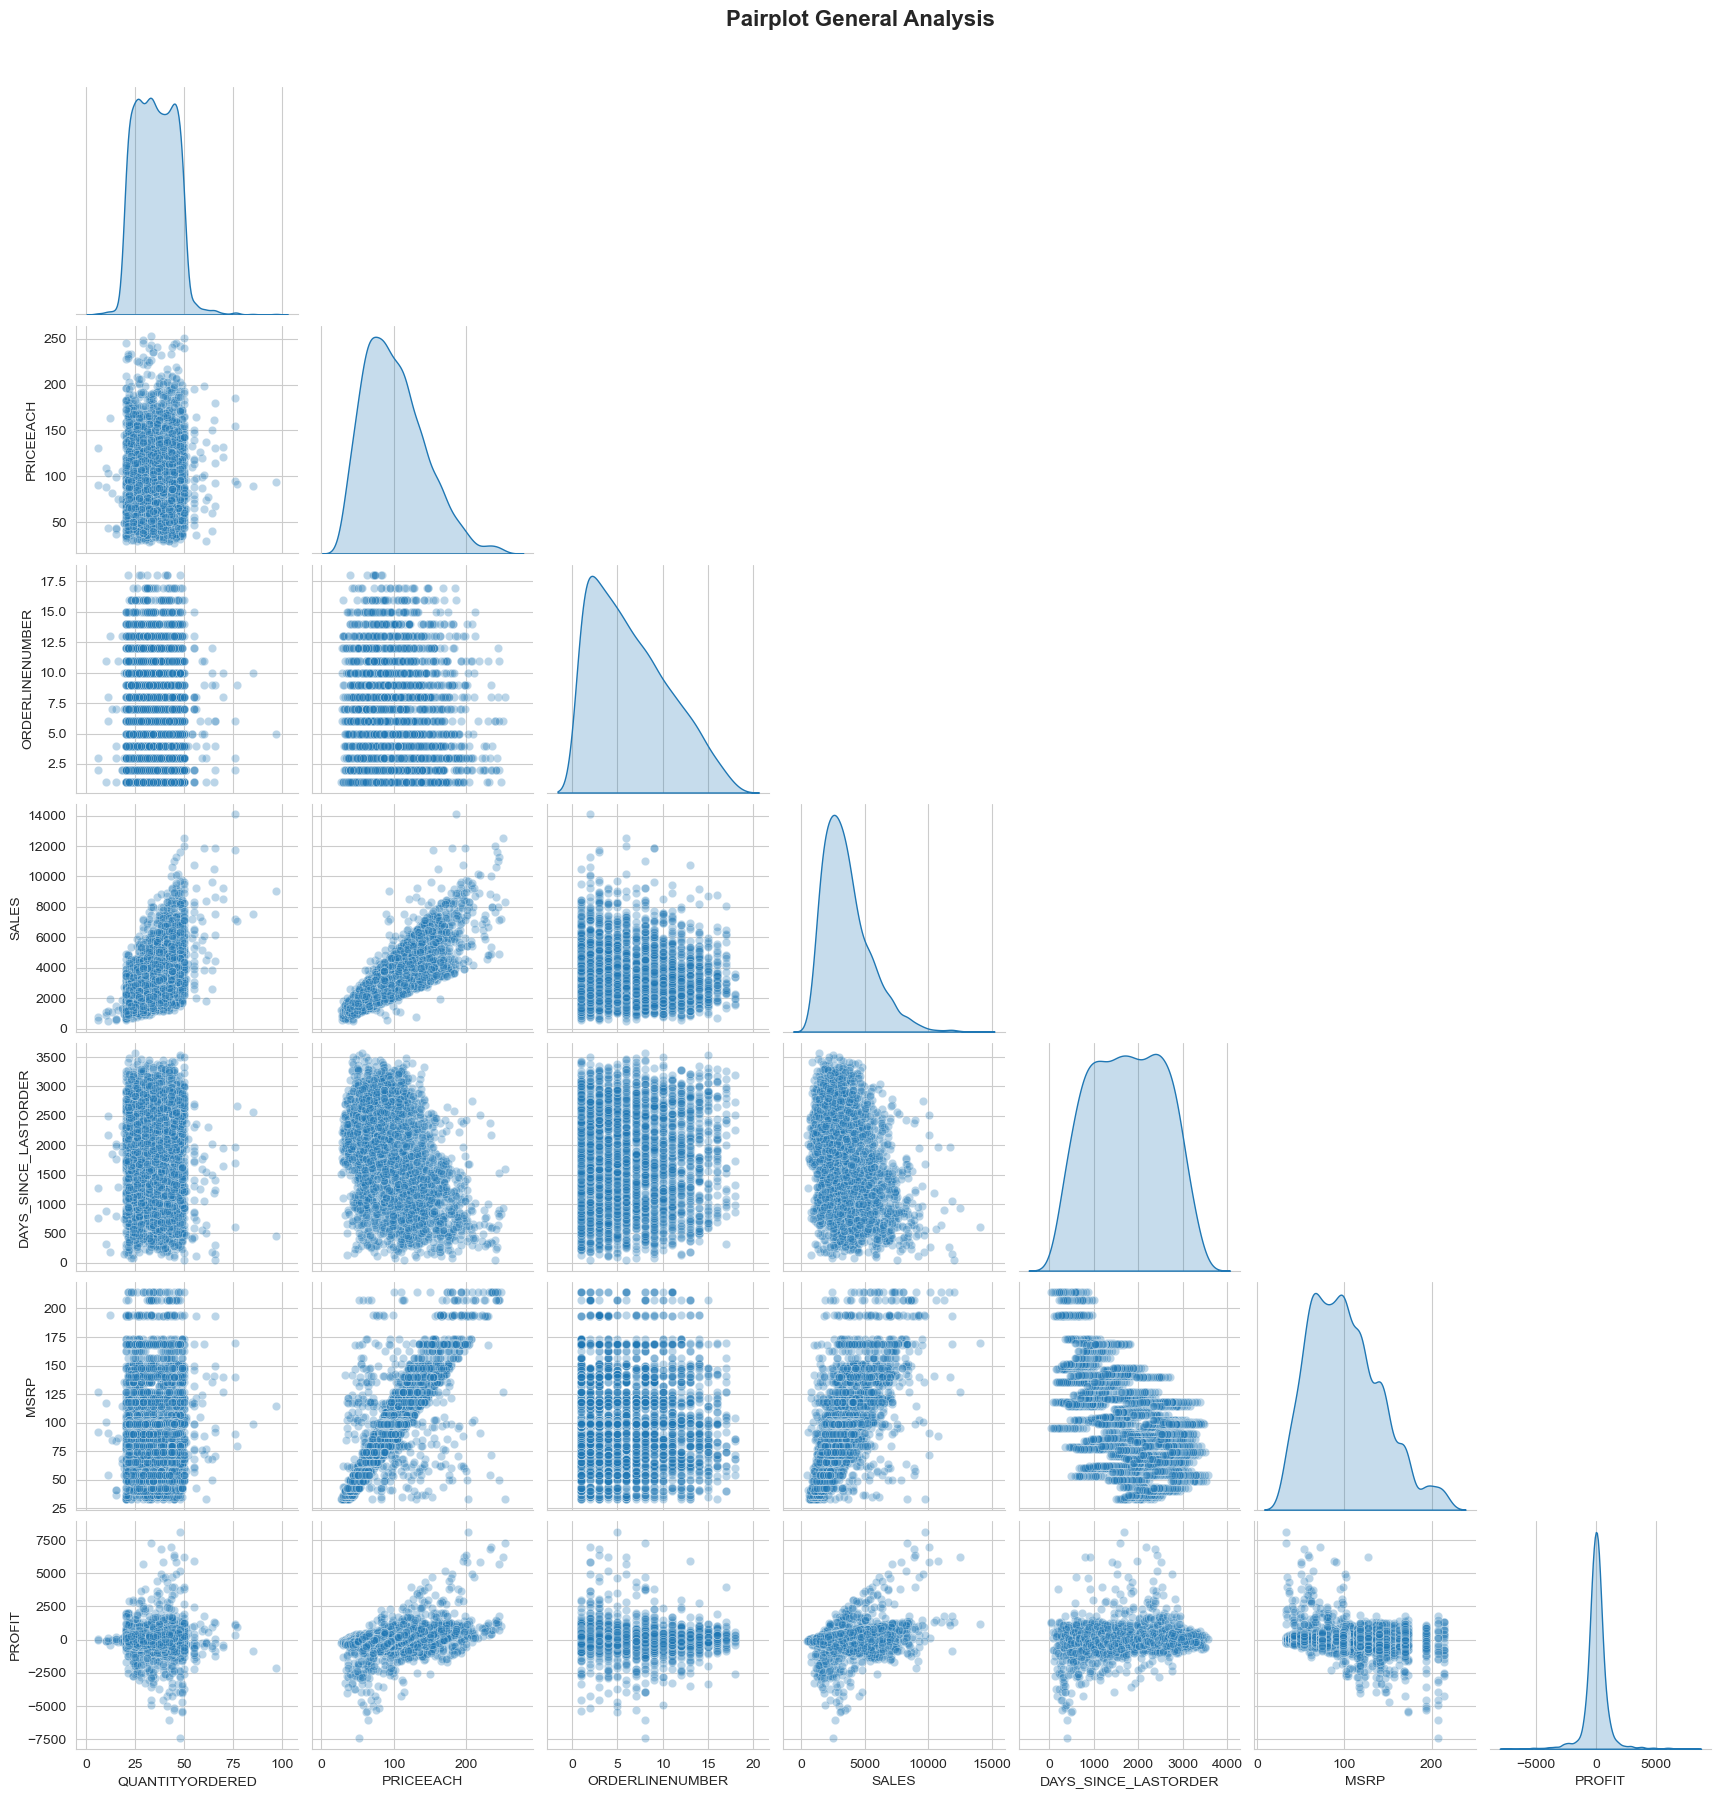

CPU times: total: 19.8 s
Wall time: 23.6 s


In [67]:
%%time
numeric_cols = ['QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'DAYS_SINCE_LASTORDER', 'MSRP', 'PROFIT']

# Create the pairplot and save it
pairplot = sns.pairplot(df[numeric_cols], corner = True, diag_kind='kde', plot_kws={'alpha': 0.3})

# Add a title to the pairplot
pairplot.fig.suptitle("Pairplot General Analysis", y=1.03, fontsize=16, fontweight='bold')

# Show the plot
plt.show()

**Insight**

- **Distribution Patterns**: The pairplot reveals that the distributions of all features tend to approximate a Gaussian distribution, indicating a potential for normality in the data.
- **Correlation Observations**: There is a strong positive linear correlation between SALES and both PRICEEACH and MSRP. This suggests that as the price per unit and the manufacturer's suggested retail price increase, the total sales also tend to rise.
- **Potential Outliers**: The PROFIT feature displays a more complex distribution, with some potential outliers that may warrant further investigation. The scatter plots suggest that while most profits are clustered around lower values, there are instances of significantly higher profits that could influence overall analysis.

In [68]:
# # Save the pairplot as an image file
# pairplot.fig.savefig("img/pairplot_numeric_columns.png", dpi=300, bbox_inches='tight')

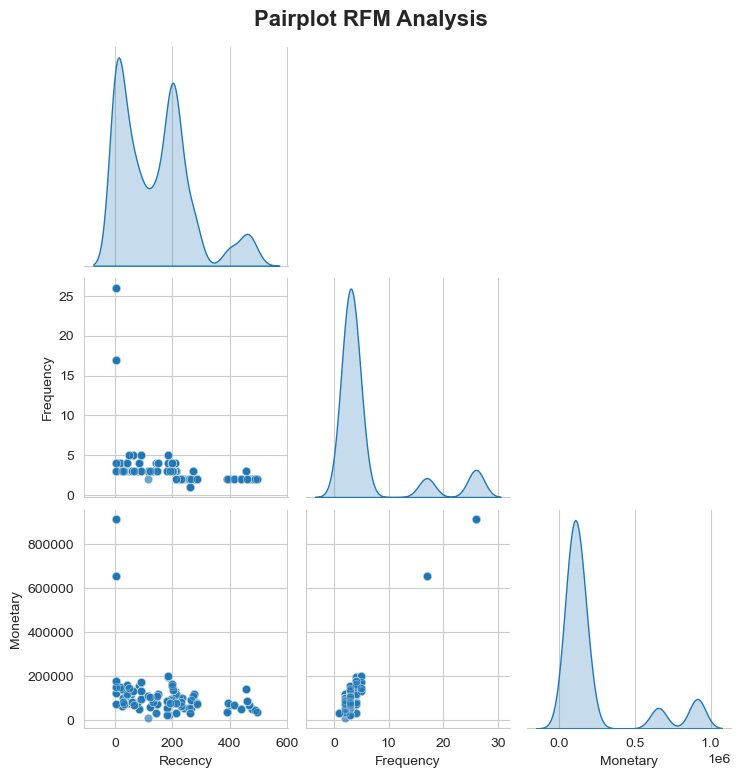

CPU times: total: 4.67 s
Wall time: 4.97 s


In [69]:
%%time
numeric_cols = ['Recency', 'Frequency', 'Monetary']
pairplot_2 = sns.pairplot(df[numeric_cols], corner = True, diag_kind='kde', plot_kws={'alpha': 0.3})

# Add a title to the pairplot
pairplot_2.fig.suptitle("Pairplot RFM Analysis", y=1.03, fontsize=16, fontweight='bold')

# Show the plot
plt.show()

**Insight**

- The distribution of the features exhibits a right-skewed shape. This skewness indicates that a small number of observations have significantly higher values compared to the majority, which cluster towards the lower end of the scale.
- Recency shows a more uniform distribution but still has some concentration of values at lower frequencies, suggesting that most customers have interacted recently.
- Frequency displays a pronounced peak at lower values, indicating that a majority of customers engage infrequently, while a few exhibit high engagement levels.
- Monetary values are heavily concentrated at lower amounts, with a few outliers contributing to the right tail, suggesting that while most customers spend less, a few high-value customers drive significant revenue.

## 3.3 Correlation Matrix

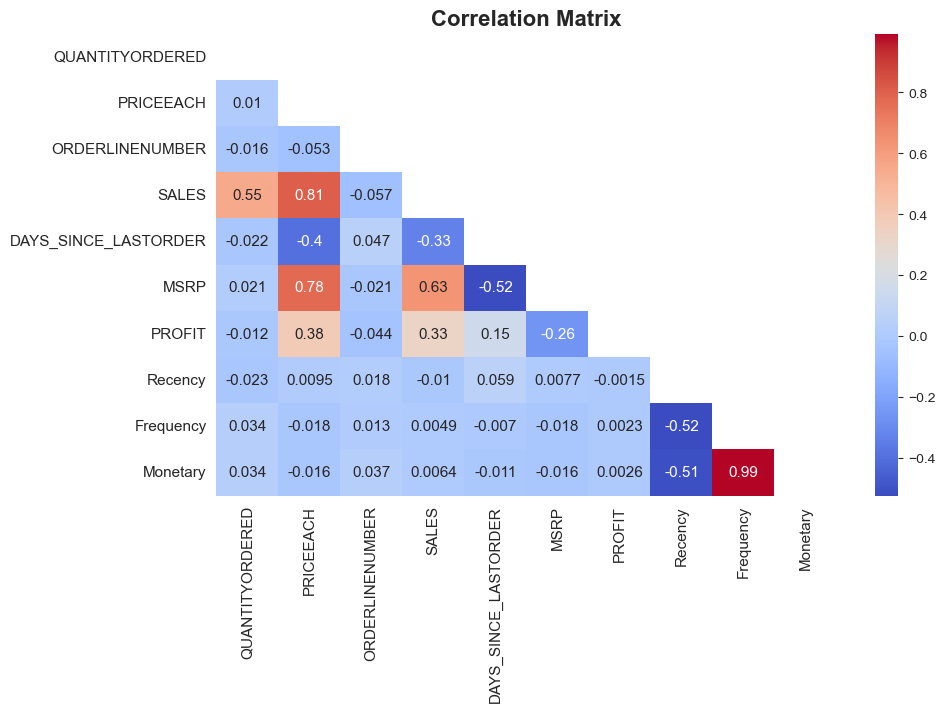

In [70]:
num_corr(df)

In [71]:
get_ranked_correlations(df)

,Variable 1,Variable 2,Correlation,Rank,Strength
89,Monetary,Frequency,0.993729,1.0,Strong
13,SALES,PRICEEACH,0.808287,2.0,Strong
15,MSRP,PRICEEACH,0.778393,3.0,Strong
35,MSRP,SALES,0.634849,4.0,Moderate
3,SALES,QUANTITYORDERED,0.553359,5.0,Moderate
45,MSRP,DAYS_SINCE_LASTORDER,-0.524285,6.0,Moderate
78,Frequency,Recency,-0.519484,7.0,Moderate
79,Monetary,Recency,-0.509642,8.0,Moderate
14,DAYS_SINCE_LASTORDER,PRICEEACH,-0.397091,9.0,Moderate
16,PROFIT,PRICEEACH,0.383564,10.0,Moderate


**Insight**

- **Strong Relationship Between Monetary and Frequency**: The correlation of 0.9937 between Monetary and Frequency indicates a very strong positive relationship. This suggests that customers who spend more (Monetary) tend to make purchases more frequently (Frequency). This insight can guide marketing strategies to target high-spending customers with loyalty programs or personalized offers to encourage even more frequent purchases.
- **Significant Impact of Price on Sales**: The correlations between SALES and PRICEEACH (0.8083) and MSRP and PRICEEACH (0.7784) are both strong, indicating that the price of items significantly influences sales volume. This suggests that pricing strategies should be carefully considered, as adjustments in price can lead to substantial changes in sales performance. It may be beneficial to analyze price elasticity to optimize pricing for maximum revenue.
- **Moderate Negative Correlation with Recency**: The moderate negative correlations between Recency and both Monetary (-0.5096) and Frequency (-0.5195) imply that as the time since a customer's last purchase increases (higher recency), their spending and purchase frequency tend to decrease. This highlights the importance of re-engagement strategies for customers who haven't purchased recently, such as targeted email campaigns or special promotions to encourage them to return.
- **Weak Correlations Indicate Limited Predictive Power**: Weak Correlations Indicate Limited Predictive Power: The majority of the correlations with low strength (e.g., below 0.3) suggest that these variables have minimal predictive power regarding each other. For instance, the correlation between Frequency and SALES (0.0049) is weak, indicating that changes in purchase frequency have little to no impact on overall sales. This insight suggests that relying on these weakly correlated variables for decision-making may not yield meaningful results, and it may be more effective to focus on stronger correlations for strategic planning.

## 3.4 In-Depth Analysis

The questions numbered 1, 2, 3, and 5 have been answered in the PowerPoint slides.

#### 4. How does the size of a deal correlate with total sales?

In [72]:
# Average of job_satisfaction with respect to workload
aggregated_df = df.groupby('DEALSIZE')['SALES'].mean().reset_index()

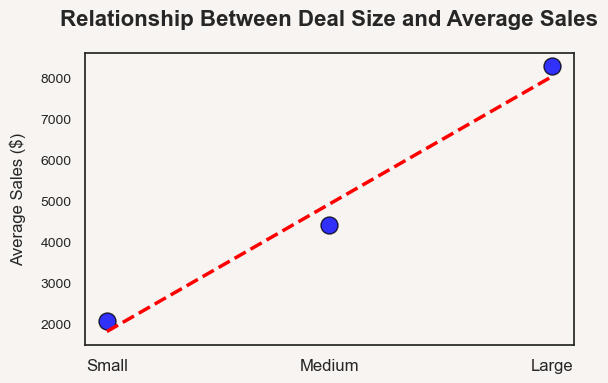

In [73]:
plot_dealsize_sales(df)

**Insight**

- **Strong Positive Correlation**:
    - The graph and data show a strong positive relationship between deal size andaverage sales. Larger deals result in signifi cantly higher average sales (8,283 dollars for large deals) compared to medium (4,397 dollars) and small deals (2,063 dollars).
- **Stepwise Growth**:
    - Average sales nearly double when moving from Small to Medium and again from Medium to Large, indicating a consistent increase in sales as deal size grows.
- **Implications**:
    - Larger deals are more lucrative and contribute signifi cantly to total sales,highlighting the importance of focusing on securing and nurturing large deals.
    - Smaller deals, while contributing less individually, may still provide value if theyoccur in high volumes.

**Recommendation**

- **Focus on Large Deals**: Allocate resources toward acquiring and retaining large deals through dedicatedaccount managers, personalized off ers, and strong customer relationships.
- **Optimize Small Deals**: Streamline the process for small deals to maximize effi ciency and profi tability. Useautomation or self-service options to reduce operational costs for thesetransactions.